
# Reviewer request -- identify motor output regions using parcel decoding, and then run S-R simulations + decoding

#### 10/25/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os
os.environ['OMP_NUM_THREADS'] = str(1)
import statsmodels.sandbox.stats.multicomp as mc
import seaborn as sns
import h5py
import tools
import nibabel as nib
plt.rcParams["font.family"] = "Arial"
import pandas as pd
import time
from importlib import reload

In [2]:
datadir = '../../data/results/MAIN/srModelPredictionAccuracies/'
labels = ['Motor decoding', 'Motor decoding (null)', 
          'S-R Model', 'S-R Model (null)', 
          'S-R Model SMN parcels', 'S-R Model SMN parcels (null)']

## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
# rh = np.loadtxt(datadir + 'BaselineMotorDecoding/RH_decoding_noncirc.txt')*100.0
# lh = np.loadtxt(datadir + 'BaselineMotorDecoding/LH_decoding_noncirc.txt')*100.0
# for i in range(len(rh)):
#     acc_dict['Model'].append('Motor decoding')
#     acc_dict['Hand'].append('Right hand')
#     acc_dict['Accuracy'].append(rh[i])
# for i in range(len(lh)):
#     acc_dict['Model'].append('Motor decoding')
#     acc_dict['Hand'].append('Left hand')
#     acc_dict['Accuracy'].append(lh[i])
# ##
# S-R Model 
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model on SMN parcels
rh = np.loadtxt(datadir + 'SRActFlowFullSMNNetwork/RH_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFullSMNNetwork/LH_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('SMN parcels')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('SMN parcels')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##

df_acc = pd.DataFrame(data=acc_dict)

In [3]:
datadir = '../../data/results/MAIN/srModelPredictionAccuracies/'


## Load in data
# Create data dict
acc_dict = {}
acc_dict['Hand'] = []
acc_dict['Model'] = []
acc_dict['Accuracy'] = []
##
# Motor decoding
# rh = np.loadtxt(datadir + 'BaselineMotorDecoding/RH_null_decoding_noncirc.txt')*100.0
# lh = np.loadtxt(datadir + 'BaselineMotorDecoding/LH_null_decoding_noncirc.txt')*100.0
# for i in range(len(rh)):
#     acc_dict['Model'].append('Motor decoding')
#     acc_dict['Hand'].append('Right hand')
#     acc_dict['Accuracy'].append(rh[i])
# for i in range(len(lh)):
#     acc_dict['Model'].append('Motor decoding')
#     acc_dict['Hand'].append('Left hand')
#     acc_dict['Accuracy'].append(lh[i])
##
# S-R Model 
rh = np.loadtxt(datadir + 'SRActFlowFull/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFull/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('S-R Model')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##
# S-R model on SMN parcels
rh = np.loadtxt(datadir + 'SRActFlowFullSMNNetwork/RH_null_decoding.txt')*100.0
lh = np.loadtxt(datadir + 'SRActFlowFullSMNNetwork/LH_null_decoding.txt')*100.0
for i in range(len(rh)):
    acc_dict['Model'].append('SMN parcels')
    acc_dict['Hand'].append('Right hand')
    acc_dict['Accuracy'].append(rh[i])
for i in range(len(lh)):
    acc_dict['Model'].append('SMN parcels')
    acc_dict['Hand'].append('Left hand')
    acc_dict['Accuracy'].append(lh[i])
##

df_acc_null = pd.DataFrame(data=acc_dict)

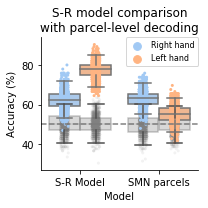

In [8]:
plt.figure(figsize=(3,3))
sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
           medianprops={'linestyle':'-','alpha':0.1},sym='',whis=[2.5,97.5],palette=['grey','grey'], boxprops=dict(alpha=.3))
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc_null,
              dodge=True,alpha=0.1,palette=['grey','grey'],zorder=0,size=3)
ax = sns.boxplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Model",y="Accuracy",hue="Hand",data=df_acc,
              dodge=True,palette="pastel",zorder=2,size=3)
plt.plot(np.arange(-0.5, 2.5),np.repeat(50.0,3),'grey',linestyle='--',label='Chance - 50%')
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Accuracy (%)',fontsize=10)
plt.xlabel('Model', fontsize=10)
plt.title('S-R model comparison\nwith parcel-level decoding', fontsize=12)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=1, borderaxespad=0., prop={'size': 8})
plt.tight_layout()
sns.despine()
# plt.savefig('../figures/manuscriptFigures/SFig_SRModel_SMNParcels/DecodingFigure.png',dpi=300)

write = False
if write:
    with pd.ExcelWriter("../../data/NatComms_SourceData.xlsx",mode='a', engine="openpyxl") as writer:
        df_acc.insert(df_acc.shape[1], 'Testing', np.repeat('Unshuffled',len(df_acc)))
        df_acc_null.insert(df_acc_null.shape[1], 'Testing', np.repeat('Shuffled',len(df_acc_null)))
        df_full = df_acc.append(df_acc_null)
        df_full.to_excel(writer,sheet_name='SFig10c')

## Perform statistical tests and print table

In [35]:
index = ['Accuracy (RH)', 'P-value (RH)', 'Accuracy (LH)', 'P-value (LH)']
df_stats = {}
#### Motor decoding
# df_stats['Motor decoding'] = []
# # Right hand
# tmp = df_acc.loc[df_acc.Model=='Motor decoding']
# tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='Motor decoding']
# tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='Motor decoding']
# acc_rh = np.mean(tmp_rh.Accuracy.values)
# # For each crossvalidation, compute p-value, then average
# tmppvals = []
# for a in tmp_rh.Accuracy.values: 
#     tmppvals.append(np.mean(a<tmp_rh_null.Accuracy.values))
# pval_rh = np.mean(tmppvals)
# df_stats['Motor decoding'].append(round(acc_rh,2))
# df_stats['Motor decoding'].append(pval_rh)
# # Left hand
# tmp = df_acc.loc[df_acc.Model=='Motor decoding']
# tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='Motor decoding']
# tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='Motor decoding']
# acc_lh = np.mean(tmp_lh.Accuracy.values)
# # For each crossvalidation, compute p-value, then average
# tmppvals = []
# for a in tmp_lh.Accuracy.values: 
#     tmppvals.append(np.mean(a<tmp_lh_null.Accuracy.values))
# pval_lh = np.mean(tmppvals)
# df_stats['Motor decoding'].append(round(acc_lh,2))
# df_stats['Motor decoding'].append(pval_lh)

#### S-R Model
df_stats['S-R Model'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='S-R Model']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='S-R Model']
acc_rh = np.mean(tmp_rh.Accuracy.values)
# For each crossvalidation, compute p-value, then average
tmppvals = []
for a in tmp_rh.Accuracy.values: 
    tmppvals.append(np.mean(a<tmp_rh_null.Accuracy.values))
pval_rh = np.mean(tmppvals)
df_stats['S-R Model'].append(round(acc_rh,2))
df_stats['S-R Model'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='S-R Model']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='S-R Model']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='S-R Model']
acc_lh = np.mean(tmp_lh.Accuracy.values)
# For each crossvalidation, compute p-value, then average
tmppvals = []
for a in tmp_lh.Accuracy.values: 
    tmppvals.append(np.mean(a<tmp_lh_null.Accuracy.values))
pval_lh = np.mean(tmppvals)
df_stats['S-R Model'].append(round(acc_lh,2))
df_stats['S-R Model'].append(pval_lh)

#### No hidden
df_stats['SMN parcels'] = []
# Right hand
tmp = df_acc.loc[df_acc.Model=='SMN parcels']
tmp_rh = df_acc.loc[df_acc.Hand=='Right hand'].loc[df_acc.Model=='SMN parcels']
tmp_rh_null = df_acc_null.loc[df_acc_null.Hand=='Right hand'].loc[df_acc_null.Model=='SMN parcels']
acc_rh = np.mean(tmp_rh.Accuracy.values)
# For each crossvalidation, compute p-value, then average
tmppvals = []
for a in tmp_rh.Accuracy.values: 
    tmppvals.append(np.mean(a<tmp_rh_null.Accuracy.values))
pval_rh = np.mean(tmppvals)
df_stats['SMN parcels'].append(round(acc_rh,2))
df_stats['SMN parcels'].append(pval_rh)
# Left hand
tmp = df_acc.loc[df_acc.Model=='SMN parcels']
tmp_lh = df_acc.loc[df_acc.Hand=='Left hand'].loc[df_acc.Model=='SMN parcels']
tmp_lh_null = df_acc_null.loc[df_acc_null.Hand=='Left hand'].loc[df_acc_null.Model=='SMN parcels']
acc_lh = np.mean(tmp_lh.Accuracy.values)
# For each crossvalidation, compute p-value, then average
tmppvals = []
for a in tmp_lh.Accuracy.values: 
    tmppvals.append(np.mean(a<tmp_lh_null.Accuracy.values))
pval_lh = np.mean(tmppvals)
df_stats['SMN parcels'].append(round(acc_lh,2))
df_stats['SMN parcels'].append(pval_lh)

df_stats = pd.DataFrame.from_dict(df_stats, orient='index', columns=index)

df_stats


,Accuracy (RH),P-value (RH),Accuracy (LH),P-value (LH)
S-R Model,62.65,0.029667,77.58,0.000018
SMN parcels,62.98,0.022551,54.92,0.211641


# Is there any overlap with hidden parcels?

In [5]:
motor_rh = np.loadtxt('../../data/results/MAIN/MotorResponseDecoding/MotorResponseRegions_RH.csv')
motor_lh = np.loadtxt('../../data/results/MAIN/MotorResponseDecoding/MotorResponseRegions_LH.csv')
hidden = np.loadtxt('../../data/results/MAIN/RSA/RSA_Similarity_SortedRegions2.txt')[:10]

In [6]:
np.intersect1d(motor_lh,hidden)

array([221.])

# Plot the number of features for each decoding

In [9]:
glasser2 = nib.load('../../data/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii').get_fdata()
df_features = {}
df_features['Number of features'] = []
df_features['Decoding'] = []
df_features['Hand'] = []

vertex_rh = nib.load('../../data/results/MAIN/MotorRegionsMasksPerSubj/sractflow_smn_outputRH_mask.dscalar.nii').get_fdata()
df_features['Number of features'].append(len(np.where(vertex_rh!=0)[1]))
df_features['Decoding'].append('S-R Model')
df_features['Hand'].append('Right hand')

vertex_lh = nib.load('../../data/results/MAIN/MotorRegionsMasksPerSubj/sractflow_smn_outputLH_mask.dscalar.nii').get_fdata()
df_features['Number of features'].append(len(np.where(vertex_lh!=0)[1]))
df_features['Decoding'].append('S-R Model')
df_features['Hand'].append('Left hand')

count = 0
for roi in motor_rh:
    ind = np.where(glasser2==roi+1)[0]
    count += len(ind)
df_features['Number of features'].append(count)
df_features['Decoding'].append('SMN parcels')
df_features['Hand'].append('Right hand')

count = 0
for roi in motor_lh:
    ind = np.where(glasser2==roi+1)[0]
    count += len(ind)
df_features['Number of features'].append(count)
df_features['Decoding'].append('SMN parcels')
df_features['Hand'].append('Left hand')

df_features = pd.DataFrame(df_features)

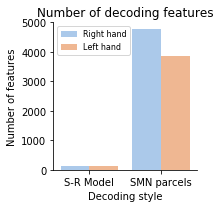

In [12]:
plt.figure(figsize=(3,3))
# ax = sns.boxplot(x="Decoding",y="Number of features",hue="Hand",data=df_features,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.barplot(x="Decoding",y="Number of features",hue="Hand",data=df_features,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of features',fontsize=10)
plt.xlabel('Decoding style', fontsize=10)
plt.title('Number of decoding features', fontsize=12)
handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[-2:], labels[-2:], loc=2, prop={'size': 8})
plt.tight_layout()
sns.despine()
# plt.savefig('../figures/manuscriptFigures/SFig_SRModel_SMNParcels/NumFeaturesPerDecoder.png',dpi=300)

write = False
if write:
    with pd.ExcelWriter("../../data/NatComms_SourceData.xlsx",mode='a', engine="openpyxl") as writer:
        df_features.to_excel(writer,sheet_name='SFig10d')

In [64]:
df_features

,Number of features,Decoding,Hand
0,136,S-R Model,Right hand
1,122,S-R Model,Left hand
2,4765,SMN parcels,Right hand
3,3877,SMN parcels,Left hand
